In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [6]:
df = pd.read_csv('F:\Telco Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f"Dataset shape: {df.shape}")

Dataset shape: (7043, 21)


<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Amin Moradpour\AppData\Local\Temp\ipykernel_5664\479831925.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('F:\Telco Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#Statistical Summary for Numerical Columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
#check missing values 
df.isnull().sum()
#we don;t any missing values in dataset 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#churn clomun unique values and counts
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
#churn values percantage 
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [13]:
#Unique valuesi in categories columns
cols = ['gender', 'Partner', 'Dependents', 'InternetService', 'Contract']
for col in cols:
    print(f"Unique values in '{col}':", df[col].unique())


Unique values in 'gender': ['Female' 'Male']
Unique values in 'Partner': ['Yes' 'No']
Unique values in 'Dependents': ['No' 'Yes']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'Contract': ['Month-to-month' 'One year' 'Two year']


In [14]:
#Roral change cloumn values 
df['TotalCharges'].value_counts()

TotalCharges
20.2      11
          11
19.75      9
19.65      8
19.9       8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
108.15     1
Name: count, Length: 6531, dtype: int64

In [15]:
#data preperation: sice we have not any missing values we can proceed to data preperation
#we will drop the customerID column 
df.drop('customerID',axis=1, inplace=True)
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].fillna(0, inplace=True) 
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


C:\Users\Amin Moradpour\AppData\Local\Temp\ipykernel_5664\2667111147.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [16]:
binary_cols_map = {
    'Partner': {'No': 0, 'Yes': 1},
    'Dependents': {'No': 0, 'Yes': 1},
    'PhoneService': {'No': 0, 'Yes': 1},
    'PaperlessBilling': {'No': 0, 'Yes': 1},
    'Churn': {'No': 0, 'Yes': 1},
    'gender': {'Female': 0, 'Male': 1}
}

service_related_binary_cols = {
    'MultipleLines': {'No phone service': 0, 'No': 0, 'Yes': 1},
    'OnlineSecurity': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'OnlineBackup': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'DeviceProtection': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'TechSupport': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'StreamingTV': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'StreamingMovies': {'No internet service': 0, 'No': 0, 'Yes': 1}
}

for col, mapping in binary_cols_map.items():
    df[col] = df[col].map(mapping)

for col, mapping in service_related_binary_cols.items():
    df[col] = df[col].map(mapping)


In [17]:
#change the categorical columns with multiple values into binary columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [18]:
#nnormalize numerical columns
from sklearn.preprocessing import StandardScaler

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [19]:
#Model Training
X = df.drop('Churn', axis=1)
y = df['Churn']   
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (7043, 23)
Shape of y: (7043,)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (5634, 23)
Shape of X_test: (1409, 23)


In [21]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
model = xgb.XGBClassifier(objective='binary:logistic',
                          n_estimators=100,    
                          learning_rate=0.1,    
                          max_depth=5,           
                          subsample=0.8,     
                          colsample_bytree=0.8, 
                          use_label_encoder=False, 
                          eval_metric='logloss',   
                          random_state=42,
                          enable_categorical=True)

In [22]:
#fitting the model 
model.fit(X_train, y_train)

c:\Users\Amin Moradpour\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:23:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [23]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.7999
Precision: 0.6503
Recall: 0.5321
F1-Score: 0.5853
ROC AUC: 0.8407


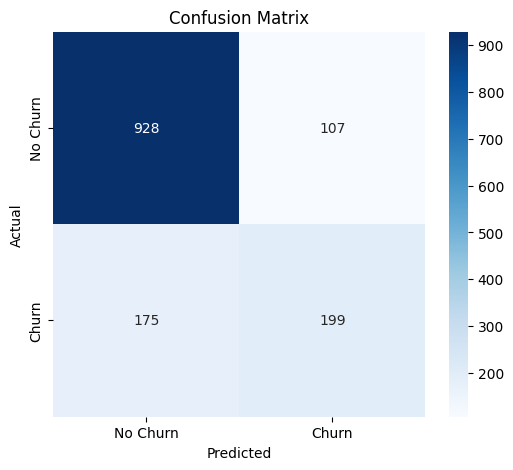

In [25]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [27]:
#Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances.head(10))

InternetService_Fiber optic       0.232697
Contract_Two year                 0.210896
Contract_One year                 0.108870
InternetService_No                0.092111
PaymentMethod_Electronic check    0.063183
tenure                            0.030876
StreamingMovies                   0.027000
PaperlessBilling                  0.020343
OnlineSecurity                    0.020263
TotalCharges                      0.020240
dtype: float32


In [28]:
#saving the model
import joblib
joblib.dump(model, 'xgboost_churn_model.pkl')


['xgboost_churn_model.pkl']

In [29]:
#saving the scaler
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler_to_save = StandardScaler() 
scaler_to_save.fit(df[numerical_cols]) 
joblib.dump(scaler_to_save, 'scaler_for_churn_prediction.pkl')

['scaler_for_churn_prediction.pkl']

In [30]:
#model tuning for better performance 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.05, 0.1],   
    'max_depth': [3, 5, 7],         
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}
base_model = xgb.XGBClassifier(objective='binary:logistic',
                               random_state=42,
                               use_label_encoder=False,
                               eval_metric='logloss',
                               enable_categorical=True 
                              )
grid_search = GridSearchCV(estimator=base_model,
                           param_grid=param_grid,
                           scoring='f1_weighted', 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best score (Recall on CV): {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\Amin Moradpour\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:24:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best score (Recall on CV): 0.7996


In [31]:
best_xgb_model = grid_search.best_estimator_
print(best_xgb_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


In [32]:
y_pred_tuned = best_xgb_model.predict(X_test)
y_proba_tuned = best_xgb_model.predict_proba(X_test)[:, 1]

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_proba_tuned)

print(f"\nAccuracy (Tuned): {accuracy_tuned:.4f}")
print(f"Precision (Tuned): {precision_tuned:.4f}")
print(f"Recall (Tuned): {recall_tuned:.4f}")
print(f"F1-Score (Tuned): {f1_tuned:.4f}")
print(f"ROC AUC (Tuned): {roc_auc_tuned:.4f}")


Accuracy (Tuned): 0.7999
Precision (Tuned): 0.6597
Recall (Tuned): 0.5080
F1-Score (Tuned): 0.5740
ROC AUC (Tuned): 0.8470


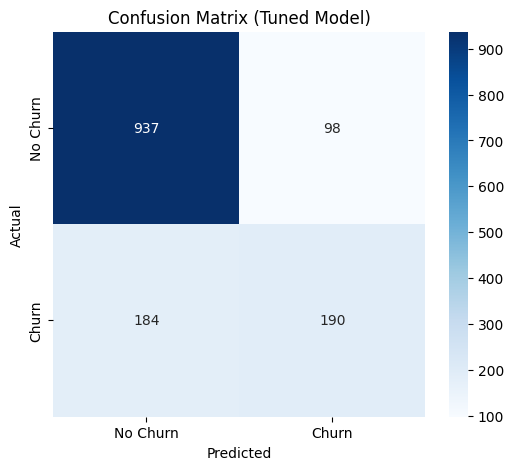

In [33]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

In [34]:
# Save the tuned model
joblib.dump(best_xgb_model, 'xgboost_churn_model_tuned.pkl')

['xgboost_churn_model_tuned.pkl']

In [35]:
#prepertion for Power Bi 
original_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
customer_ids = original_df['customerID']
original_df['TotalCharges'] = original_df['TotalCharges'].replace(' ', np.nan)
original_df['TotalCharges'] = pd.to_numeric(original_df['TotalCharges'])
original_df['TotalCharges'].fillna(0, inplace=True)


C:\Users\Amin Moradpour\AppData\Local\Temp\ipykernel_5664\3027569527.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  original_df['TotalCharges'].fillna(0, inplace=True)


In [36]:
binary_cols_map = {
    'Partner': {'No': 0, 'Yes': 1},
    'Dependents': {'No': 0, 'Yes': 1},
    'PhoneService': {'No': 0, 'Yes': 1},
    'PaperlessBilling': {'No': 0, 'Yes': 1},
    'Churn': {'No': 0, 'Yes': 1},
    'gender': {'Female': 0, 'Male': 1}
}

service_related_binary_cols = {
    'MultipleLines': {'No phone service': 0, 'No': 0, 'Yes': 1},
    'OnlineSecurity': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'OnlineBackup': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'DeviceProtection': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'TechSupport': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'StreamingTV': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'StreamingMovies': {'No internet service': 0, 'No': 0, 'Yes': 1}
}

for col, mapping in binary_cols_map.items():
    original_df[col] = original_df[col].map(mapping)

for col, mapping in service_related_binary_cols.items():
    original_df[col] = original_df[col].map(mapping)


categorical_features_for_ohe = ['InternetService', 'Contract', 'PaymentMethod']
original_df = pd.get_dummies(original_df, columns=categorical_features_for_ohe, drop_first=True)

df_for_prediction = original_df.drop('customerID', axis=1)


In [40]:
# load the scaler 
import joblib
from sklearn.preprocessing import StandardScaler 
scaler = joblib.load('scaler_for_churn_prediction.pkl')


In [41]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_for_prediction[numerical_cols] = scaler.transform(df_for_prediction[numerical_cols])
model = joblib.load('xgboost_churn_model_tuned.pkl') 

In [ ]:
model_features = model.get_booster().feature_names

df_pred_input = df_for_prediction.drop(columns=['Churn'], errors='ignore')
churn_probabilities = model.predict_proba(df_pred_input)[:, 1]
optimal_threshold = 0.35
churn_predictions = (churn_probabilities >= optimal_threshold).astype(int)
original_df['Churn_Probability'] = churn_probabilities
original_df['Predicted_Churn'] = churn_predictions 
original_df['Predicted_Churn_Label'] = original_df['Predicted_Churn'].map({0: 'No Churn', 1: 'Churn'})
print("\nSample of original_df with new prediction columns:")
print(original_df[['customerID', 'Churn', 'Churn_Probability', 'Predicted_Churn_Label']].head())


Sample of original_df with new prediction columns:
   customerID  Churn  Churn_Probability Predicted_Churn_Label
0  7590-VHVEG      0           0.246389              No Churn
1  5575-GNVDE      0           0.049202              No Churn
2  3668-QPYBK      1           0.109523              No Churn
3  7795-CFOCW      0           0.054867              No Churn
4  9237-HQITU      1           0.279292              No Churn


In [45]:
output_csv_path = 'telco_churn_predictions_for_powerbi.csv'
original_df.to_csv(output_csv_path, index=False)
print(f"\nProcessed data with predictions saved to '{output_csv_path}'")


Processed data with predictions saved to 'telco_churn_predictions_for_powerbi.csv'
